In [1]:
import sys
import pandas as pd

if ".." not in sys.path:
    sys.path.append("..")

import seaborn as sns

from src.settings import NB_DIR
from src.evaluation.evaluator import Evaluator
from src.evaluation.plots import plot_scores, plot_cumulative_antigen_sum

sns.set_context("paper")
sns.set_style(
    "whitegrid", {
        'axes.linewidth': 2,
        'axes.edgecolor':'black',
        'grid.linestyle': '--',
        'axes.xmargin': 0,
        'axes.ymargin': 0,
    }
)

SPECIES = [
    "UP000001432",
    "UP000000799",
    "UP000000800",
    "UP000000625",
    "UP000001584",
    "UP000000425",
    "UP000006386",
    "UP000000586",
    "UP000000750",
    "UP000326807",
]

GN_SPECIES = [
    "UP000000425",
    "UP000000625",
    "UP000000799",
    "UP000001432",
    "UP000000800",
    "UP000326807",
]

GP_SPECIES = [
    "UP000000750",
    "UP000000586",
    "UP000001584",
    "UP000006386",
]

def evaluate_auroc_cv(species, metric="AUROC", hue="Model", filename=None, aspect=0.35):
    all_rows = []

    for sp in species:
        evaluator = Evaluator(sp)
        all_rows.append(evaluator.score_cv())
    
    cvs = pd.concat(all_rows, axis=0, ignore_index=True)

    if filename is not None:
        filename = NB_DIR / "imgs" / filename
    plot_scores(cvs, methods=["Feature-based", "PSE-based"], hue=hue, metric=metric, aspect=aspect, sharey=True, filename=filename, ylim=(0.5, None)) # type: ignore
    return cvs.groupby(["Species", hue]).agg(["mean", "std"]).round(3).drop("Trial", axis=1) # type: ignore


def evaluate_metrics_test(species, methods=["Feature-based", "PSE-based",], hue="Model", metric="AUROC", filename=None, aspect=0.35):
    all_rows = []

    for sp in species:
        evaluator = Evaluator(sp)
        all_rows.append(evaluator.score_metrics())
    
    scores = pd.concat(all_rows, axis=0, ignore_index=True)

    if filename is not None:
        filename = NB_DIR / "imgs" / filename
    plot_scores(scores, methods=methods, metric=metric, hue=hue, aspect=aspect, sharey=True, filename=filename, ylim=(0.5, None)) # type: ignore
    return scores.groupby(["Species", hue]).agg(["mean", "std"]).round(3).drop("Trial", axis=1) # type: ignore


def evaluate_nadr_proteome(species, metric="nADR", filename=None):
    all_rows = []
    for sp in species:
        evaluator = Evaluator(sp)
        all_rows.append(evaluator.score_nadr())
    scores = pd.concat(all_rows, axis=0, ignore_index=True)

    if filename is not None:
        filename = NB_DIR / "imgs" / filename
    plot_scores(scores, methods=["Standard RV", "PSE-based"], metric=metric, aspect=0.35, sharey=True, filename=filename, ylim=(0.2, None)) # type: ignore

    return scores.groupby(["Species", "Method"]).agg(["mean", "std"]).round(3).drop("Trial", axis=1) # type: ignore


def evaluate_no_exps_proteome(species, metric="N. Experiments", filename=None, how_many=None):
    all_rows = []
    for sp in species:
        evaluator = Evaluator(sp)
        all_rows.append(evaluator.score_no_experiments(how_many=how_many))
    scores = pd.concat(all_rows, axis=0, ignore_index=True)

    if filename is not None:
        filename = NB_DIR / "imgs" / filename
    plot_scores(scores, methods=["Standard RV", "PSE-based"], metric=metric, aspect=0.35, sharey=True, filename=filename, ylim=(0.2, None)) # type: ignore

    return scores.groupby(["Species", "Method"]).agg(["mean", "std"]).round(3).drop("Trial", axis=1) # type: ignore


def evaluate_cumulative_antigen_sum(species, filename=None, aspect=0.5):
    all_rows = []
    for sp in species:
        evaluator = Evaluator(sp)
        all_rows.append(evaluator.score_counts())
    counts = pd.concat(all_rows, axis=0, ignore_index=True)

    if filename is not None:
        filename = NB_DIR / "imgs" / filename
    plot_cumulative_antigen_sum(counts, methods=["Standard RV", "PSE-based"], aspect=aspect, sharex=False, filename=filename) # type: ignore

## 1. CV Results

AUROC       
                                                mean    std
Species                         Model                      
Actinobacillus pleuropneumoniae Feature-based  0.813  0.005
                                PSE-based      0.827  0.003
Campylobacter jejuni            Feature-based  0.812  0.006
                                PSE-based      0.813  0.003
Chlamydia muridarum             Feature-based  0.819  0.005
                                PSE-based      0.829  0.003
Escherichia coli                Feature-based  0.806  0.005
                                PSE-based      0.821  0.004
Mycobacterium tuberculosis      Feature-based  0.824  0.006
                                PSE-based      0.819  0.003
Neisseria meningitidis          Feature-based  0.822  0.006
                                PSE-based      0.818  0.002
Staphylococcus aureus           Feature-based  0.813  0.006
                                PSE-based      0.813  0.003
Streptococcus pneumoniae        Feature-based  0.816  0.005
                                PSE-based      0.815  0.003
Streptococcus pyogenes          Feature-based  0.816  0.006
                                PSE-based      0.822  0.003
Yersinia pestis                 Feature-based  0.816  0.005
                                PSE-based      0.818  0.003

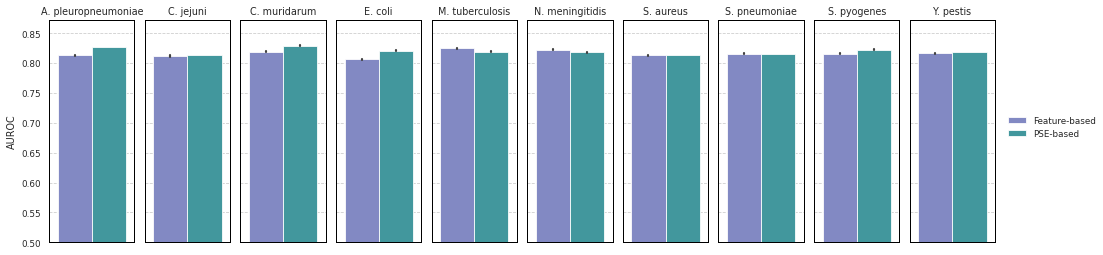

In [2]:
evaluate_auroc_cv(SPECIES)

## 2. Feature-based vs. PSE-based Evaluation

AUROC          AUPR         \
                                                mean    std   mean    std   
Species                         Model                                       
Actinobacillus pleuropneumoniae Feature-based  0.930  0.027  0.942  0.023   
                                PSE-based      0.985  0.005  0.985  0.005   
Campylobacter jejuni            Feature-based  0.904  0.036  0.888  0.046   
                                PSE-based      0.938  0.007  0.908  0.018   
Chlamydia muridarum             Feature-based  0.812  0.025  0.877  0.016   
                                PSE-based      0.856  0.015  0.888  0.009   
Escherichia coli                Feature-based  0.898  0.013  0.847  0.020   
                                PSE-based      0.903  0.007  0.866  0.022   
Mycobacterium tuberculosis      Feature-based  0.707  0.036  0.757  0.030   
                                PSE-based      0.809  0.008  0.813  0.015   
Neisseria meningitidis          Feature-based  0.755  0.022  0.774  0.031   
                                PSE-based      0.797  0.011  0.778  0.016   
Staphylococcus aureus           Feature-based  0.878  0.016  0.901  0.015   
                                PSE-based      0.888  0.009  0.906  0.008   
Streptococcus pneumoniae        Feature-based  0.762  0.036  0.777  0.030   
                                PSE-based      0.847  0.033  0.854  0.021   
Streptococcus pyogenes          Feature-based  0.829  0.017  0.811  0.024   
                                PSE-based      0.740  0.012  0.745  0.015   
Yersinia pestis                 Feature-based  0.777  0.022  0.804  0.038   
                                PSE-based      0.807  0.017  0.786  0.027   

                                                  F1           MCC         \
                                                mean    std   mean    std   
Species                         Model                                       
Actinobacillus pleuropneumoniae Feature-based  0.857  0.042  0.723  0.083   
                                PSE-based      0.926  0.027  0.857  0.055   
Campylobacter jejuni            Feature-based  0.821  0.052  0.650  0.100   
                                PSE-based      0.848  0.096  0.716  0.136   
Chlamydia muridarum             Feature-based  0.803  0.036  0.644  0.076   
                                PSE-based      0.786  0.013  0.638  0.034   
Escherichia coli                Feature-based  0.823  0.020  0.658  0.039   
                                PSE-based      0.859  0.011  0.721  0.022   
Mycobacterium tuberculosis      Feature-based  0.644  0.035  0.348  0.065   
                                PSE-based      0.761  0.090  0.558  0.108   
Neisseria meningitidis          Feature-based  0.697  0.033  0.397  0.066   
                                PSE-based      0.758  0.043  0.522  0.064   
Staphylococcus aureus           Feature-based  0.771  0.038  0.549  0.074   
                                PSE-based      0.763  0.044  0.532  0.058   
Streptococcus pneumoniae        Feature-based  0.647  0.053  0.313  0.103   
                                PSE-based      0.729  0.046  0.485  0.058   
Streptococcus pyogenes          Feature-based  0.786  0.027  0.574  0.055   
                                PSE-based      0.736  0.088  0.490  0.124   
Yersinia pestis                 Feature-based  0.713  0.035  0.428  0.070   
                                PSE-based      0.782  0.075  0.580  0.102   

                                                PREC           REC         
                                                mean    std   mean    std  
Species                         Model                                      
Actinobacillus pleuropneumoniae Feature-based  0.865  0.042  0.858  0.042  
                                PSE-based      0.930  0.028  0.926  0.027  
Campylobacter jejuni            Feature-based  0.829  0.049  0.822  0.051  
                                PSE-based      

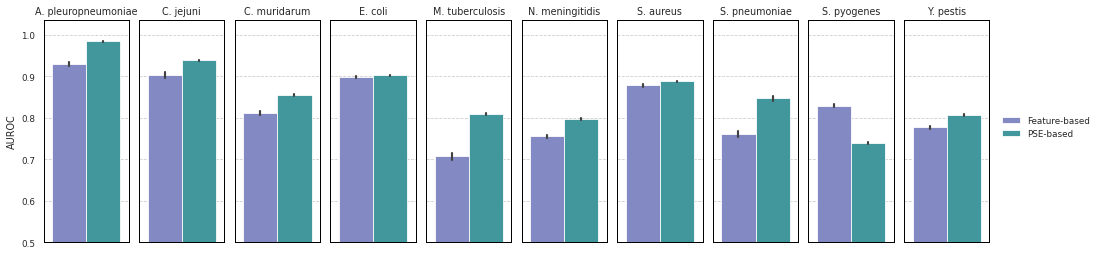

In [3]:
evaluate_metrics_test(SPECIES, metric="AUROC")

## 3. iBPA Benchmark

AUROC       AUPR          F1         MCC        PREC  \
                     mean  std  mean   std  mean   std  mean   std  mean   
Species   Model                                                            
Benchmark PSE-based  0.85  0.0  0.85  0.01  0.79  0.01  0.57  0.01  0.79   

                            REC        
                      std  mean   std  
Species   Model                        
Benchmark PSE-based  0.01  0.79  0.01

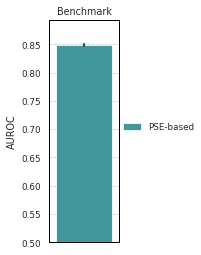

In [5]:
evaluate_metrics_test(["benchmark"], methods=["PSE-based"], metric="AUROC", aspect=0.5).round(2)

## 4. In-vivo antigen prioritization

nADR       
                                              mean    std
Species                         Method                   
Actinobacillus pleuropneumoniae PSE-based    0.640  0.025
                                Standard RV  0.508  0.163
Campylobacter jejuni            PSE-based    0.844  0.037
                                Standard RV  0.479  0.199
Chlamydia muridarum             PSE-based    0.794  0.025
                                Standard RV  0.520  0.134
Escherichia coli                PSE-based    0.953  0.031
                                Standard RV  0.499  0.217
Mycobacterium tuberculosis      PSE-based    0.820  0.031
                                Standard RV  0.508  0.077
Neisseria meningitidis          PSE-based    0.740  0.032
                                Standard RV  0.497  0.092
Staphylococcus aureus           PSE-based    0.794  0.076
                                Standard RV  0.473  0.179
Streptococcus pneumoniae        PSE-based    0.680  0.070
                                Standard RV  0.484  0.203
Streptococcus pyogenes          PSE-based    0.785  0.015
                                Standard RV  0.525  0.080
Yersinia pestis                 PSE-based    0.628  0.017
                                Standard RV  0.513  0.118

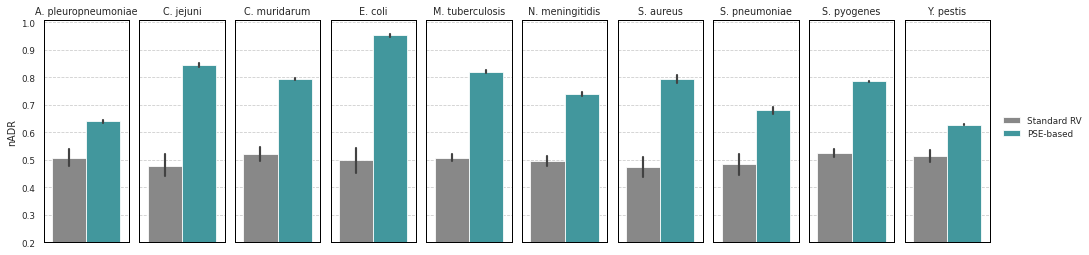

In [7]:
evaluate_nadr_proteome(SPECIES)

## 5. Plot of the antigen cumulative distribution

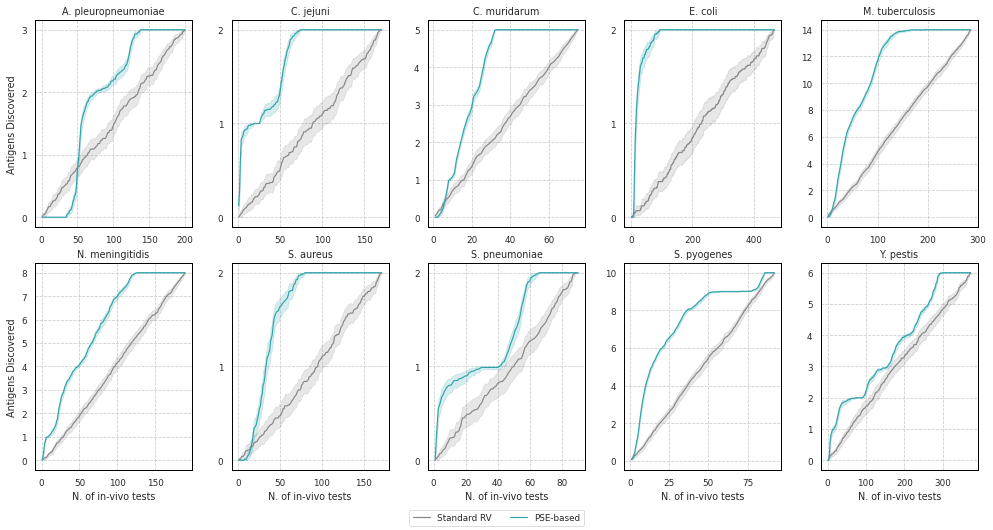

In [4]:
evaluate_cumulative_antigen_sum(SPECIES, "fig1.pdf", aspect=0.7)

## 6. Number of experiments to discover all antigens

N. Experiments       
                                                      mean    std
Species                         Method                           
Actinobacillus pleuropneumoniae PSE-based            114.0   15.0
                                Standard RV          148.0   38.0
Campylobacter jejuni            PSE-based             51.0   12.0
                                Standard RV          118.0   38.0
Chlamydia muridarum             PSE-based             28.0    3.0
                                Standard RV           62.0   11.0
Escherichia coli                PSE-based             32.0   23.0
                                Standard RV          308.0  112.0
Mycobacterium tuberculosis      PSE-based            120.0   21.0
                                Standard RV          268.0   18.0
Neisseria meningitidis          PSE-based            107.0   13.0
                                Standard RV          170.0   15.0
Staphylococcus aureus           PSE-based             44.0   16.0
                                Standard RV          121.0   37.0
Streptococcus pneumoniae        PSE-based             52.0    6.0
                                Standard RV           62.0   21.0
Streptococcus pyogenes          PSE-based             82.0    2.0
                                Standard RV           84.0    7.0
Yersinia pestis                 PSE-based            278.0    9.0
                                Standard RV          322.0   45.0

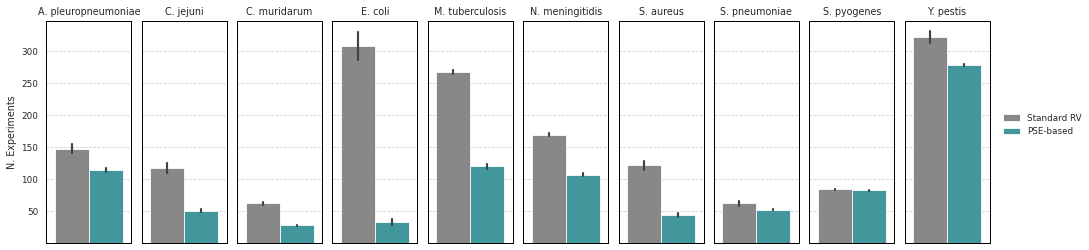

In [9]:
evaluate_no_exps_proteome(SPECIES, how_many=None).round(0)

## 7. Number of experiments to discover first antigen

N. Experiments       
                                                      mean    std
Species                         Method                           
Actinobacillus pleuropneumoniae PSE-based             48.0    6.0
                                Standard RV           47.0   35.0
Campylobacter jejuni            PSE-based              3.0    4.0
                                Standard RV           60.0   42.0
Chlamydia muridarum             PSE-based              6.0    2.0
                                Standard RV           11.0    9.0
Escherichia coli                PSE-based             13.0    7.0
                                Standard RV          160.0  110.0
Mycobacterium tuberculosis      PSE-based             11.0    7.0
                                Standard RV           19.0   20.0
Neisseria meningitidis          PSE-based              3.0    2.0
                                Standard RV           24.0   20.0
Staphylococcus aureus           PSE-based             27.0   12.0
                                Standard RV           59.0   36.0
Streptococcus pneumoniae        PSE-based              6.0    9.0
                                Standard RV           31.0   21.0
Streptococcus pyogenes          PSE-based              3.0    1.0
                                Standard RV            8.0    6.0
Yersinia pestis                 PSE-based              9.0    9.0
                                Standard RV           51.0   46.0

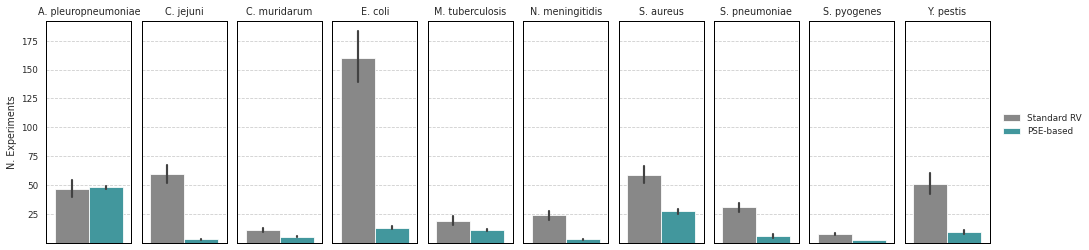

In [8]:
evaluate_no_exps_proteome(SPECIES, how_many=1).round(0)